#Understanding the data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('usable-dataset.csv')
data.count()

itching                 4920
skin_rash               4920
nodal_skin_eruptions    4920
continuous_sneezing     4920
shivering               4920
                        ... 
inflammatory_nails      4920
blister                 4920
red_sore_around_nose    4920
yellow_crust_ooze       4920
prognosis               4920
Length: 133, dtype: int64

In [ ]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
data.shape

(4920, 133)

In [ ]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

We observe that there are no missing values in our dataset

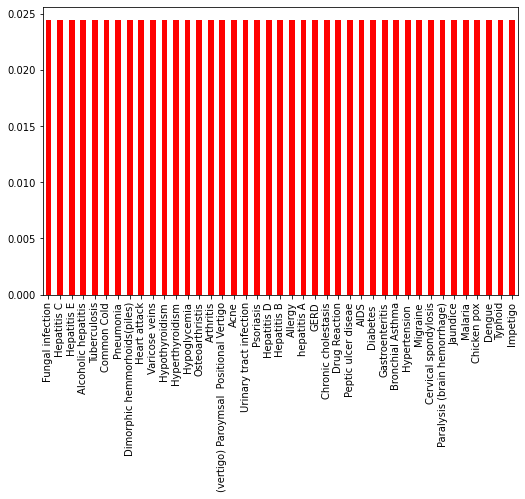

In [ ]:
data['prognosis'].value_counts(normalize = True).plot.bar(color='red')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)

Data for each type of disease is present equally

#Splitting into train and test

In [ ]:
x = data.drop(['prognosis'],axis =1)
y = data['prognosis']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#Models

##Preparing for metrics for each model

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import statistics
from sklearn.metrics import confusion_matrix

y_bin=y_test.to_numpy()
y_bin=label_binarize(y_test,classes=np.unique(y_test))

global_auc_val={}
global_accuracy={}

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=2)
logistic.fit(x_train, y_train)
accuracy = logistic.score(x_test, y_test)
global_accuracy['Logistic Regression']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9544334975369458


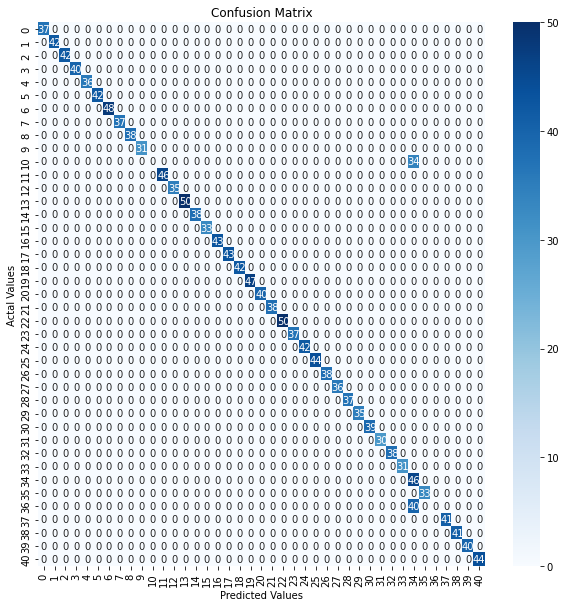

In [ ]:
y_pred=logistic.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 1.0


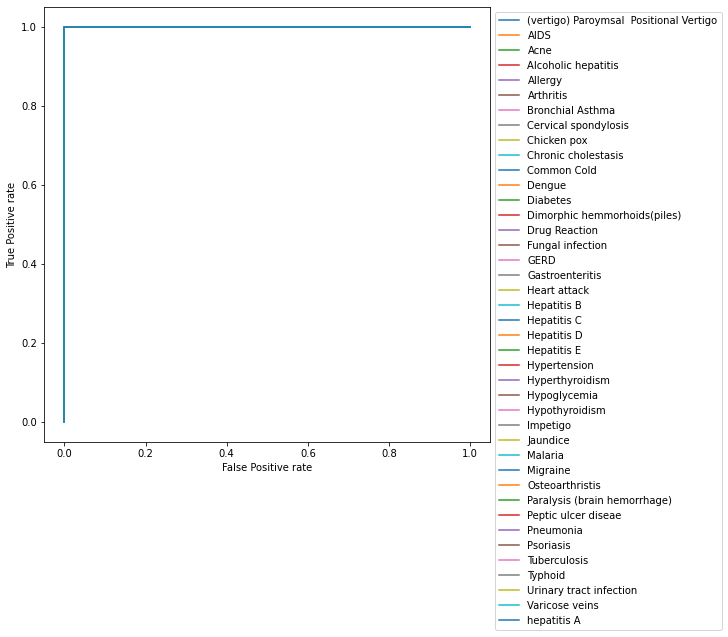

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=logistic.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Logistic Regression']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

##Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma=0.01, C=0.18, probability=True)
svc.fit(x_train, y_train)
accuracy = svc.score(x_test, y_test)
global_accuracy['Support Vector Machine']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9661330049261084


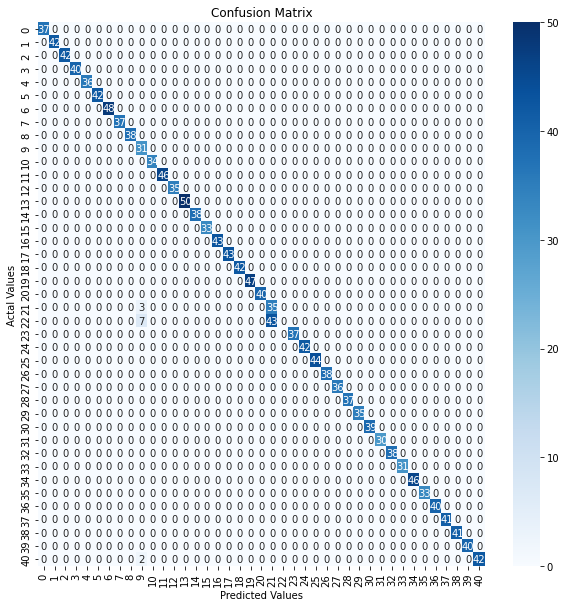

In [ ]:
y_pred=svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 1.0


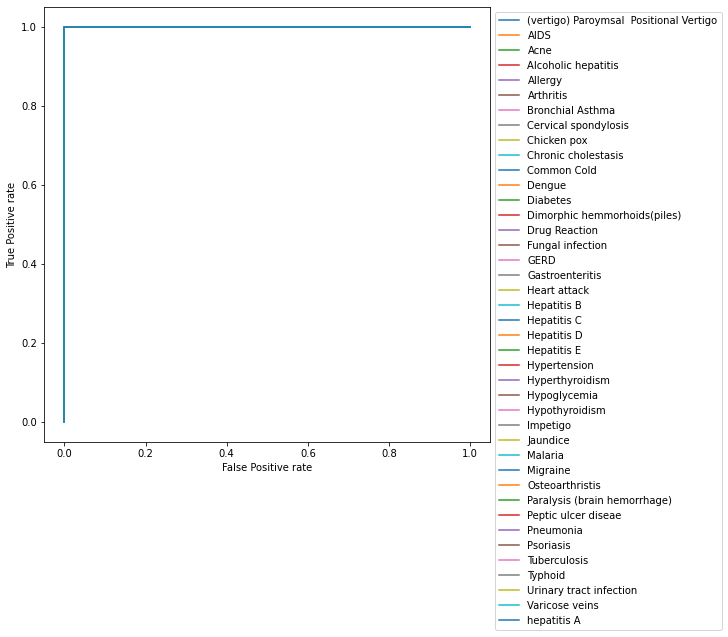

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=svc.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Support Vector Machine']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

##Multinomial Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1000)
mnb.fit(x_train, y_train)
accuracy = mnb.score(x_test, y_test)
global_accuracy['Multinomial Naive Bayes']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9513546798029556


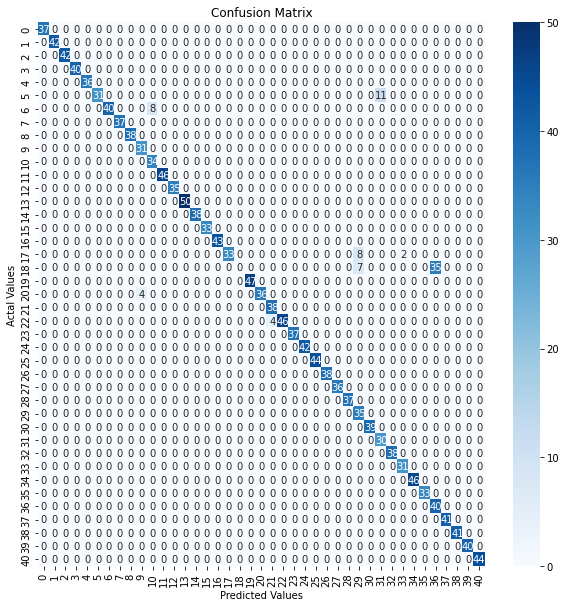

In [ ]:
y_pred=mnb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 0.999757586843805


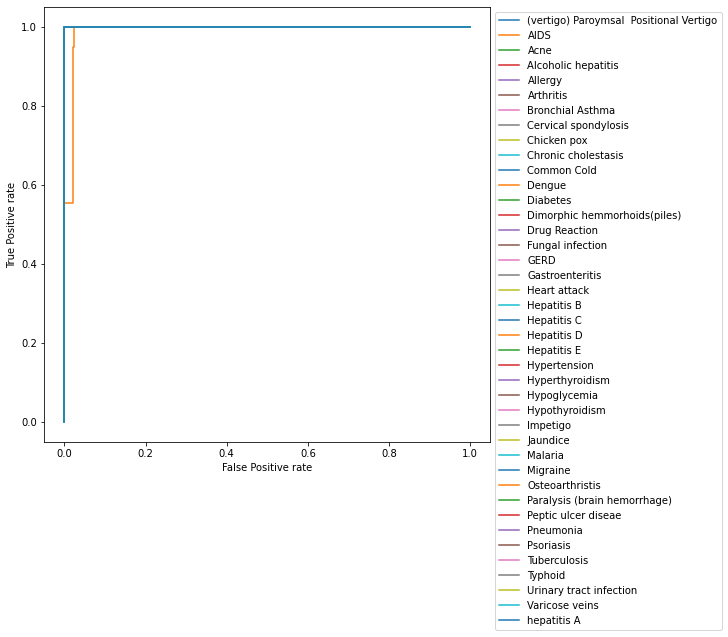

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=mnb.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Multinomial Naive Bayes']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

##K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(x_train, y_train)
accuracy = knn.score(x_test, y_test)
global_accuracy['K-Nearest Neighbours']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9618226600985221


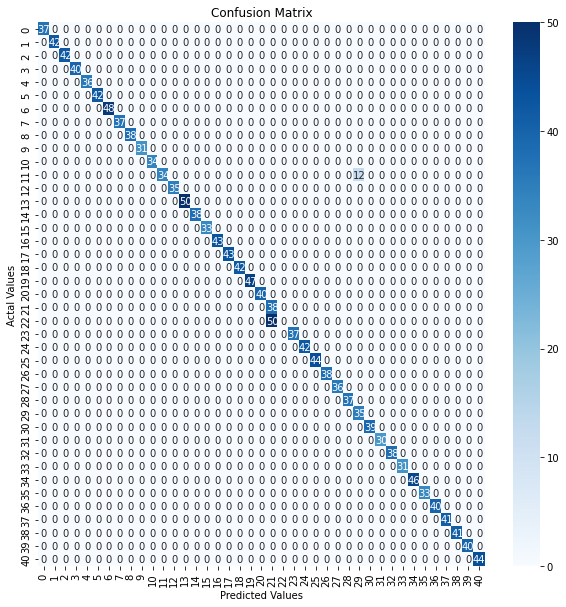

In [ ]:
y_pred=knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 1.0


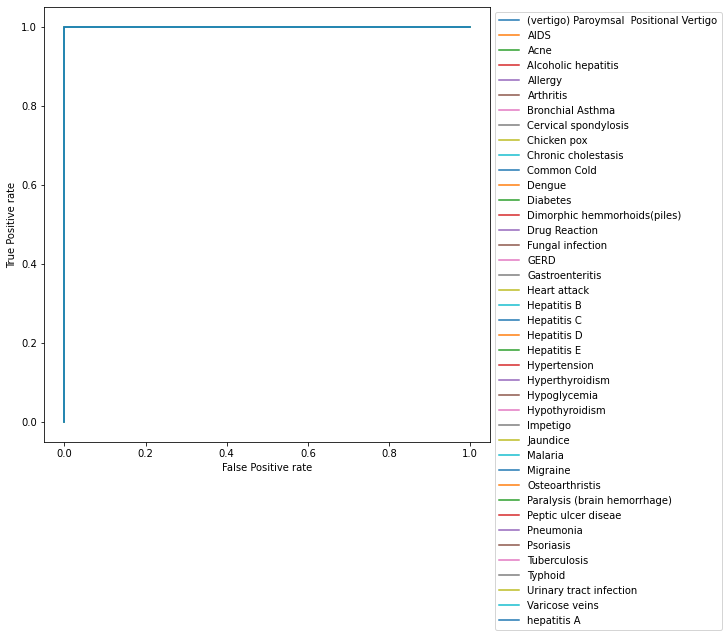

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=knn.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['K-Nearest Neighbours']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest=RFC(n_estimators=20,max_depth=10)
forest.fit(x_train, y_train)
accuracy = forest.score(x_test, y_test)
global_accuracy['Random Forest Classifier']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9833743842364532


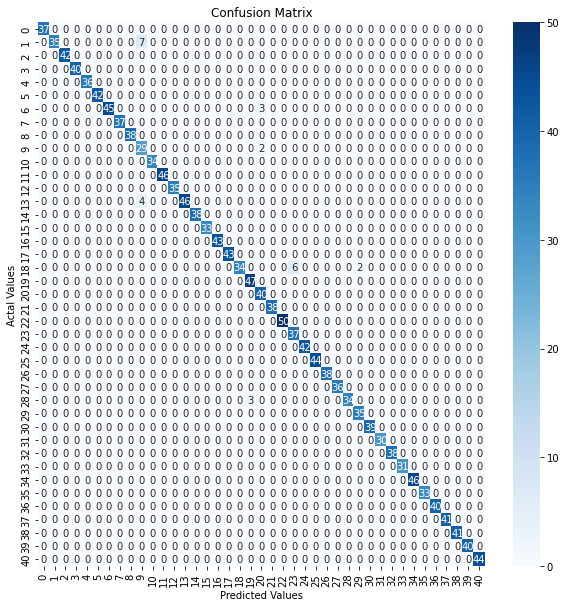

In [ ]:
y_pred=forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 0.9999067187565057


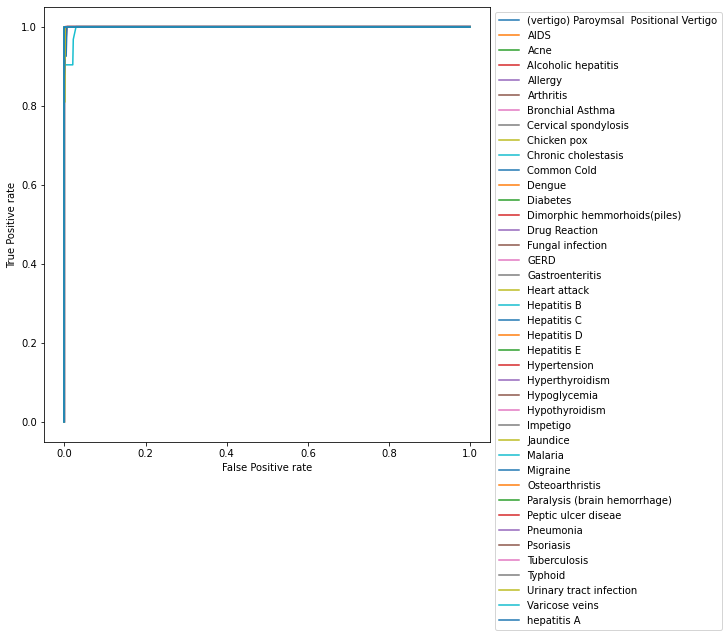

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=forest.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Random Forest Classifier']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
tree=DTC(max_depth=40)
tree.fit(x_train, y_train)
accuracy = tree.score(x_test, y_test)
global_accuracy['Decision Tree']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9649014778325123


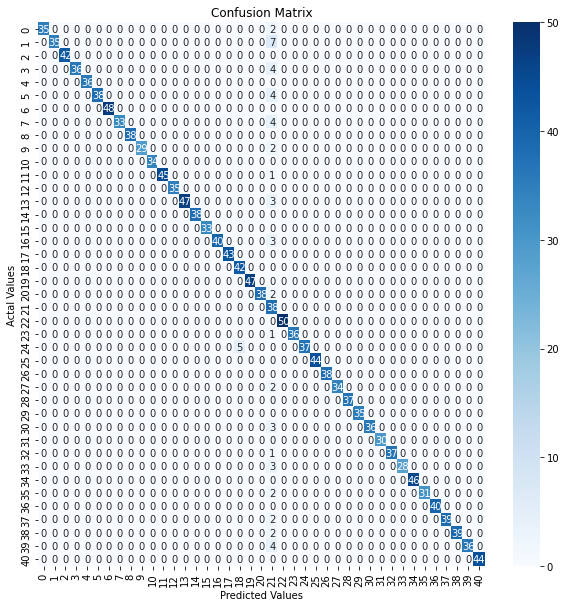

In [ ]:
y_pred=tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 0.9994932020525502


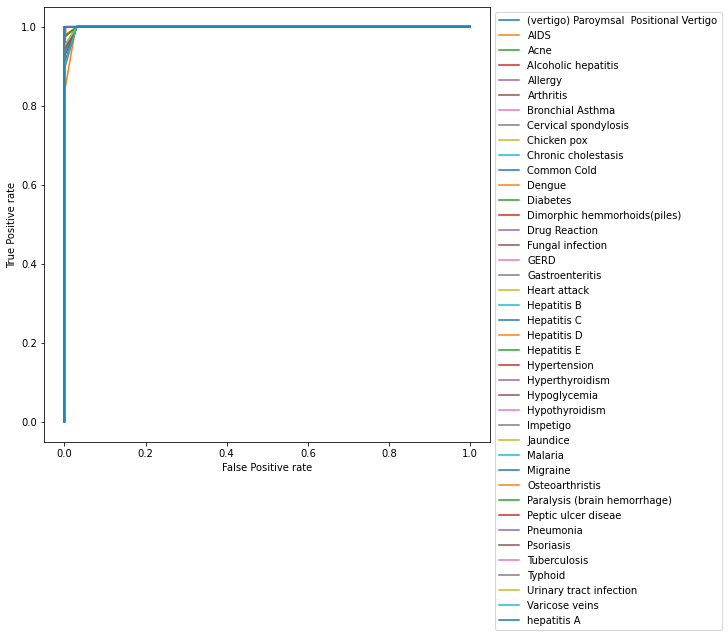

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=tree.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Decision Tree']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

##Multi-layer Perceptron Classifier (Neural Network)

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP

###Logistic Activation

In [ ]:
mlp1=MLP(hidden_layer_sizes=(50,),activation='logistic',max_iter=12)
mlp1.fit(x_train, y_train)
accuracy = mlp1.score(x_test, y_test)
global_accuracy['Multilayer Perceptron Logistic Activation']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 0.9895320197044335


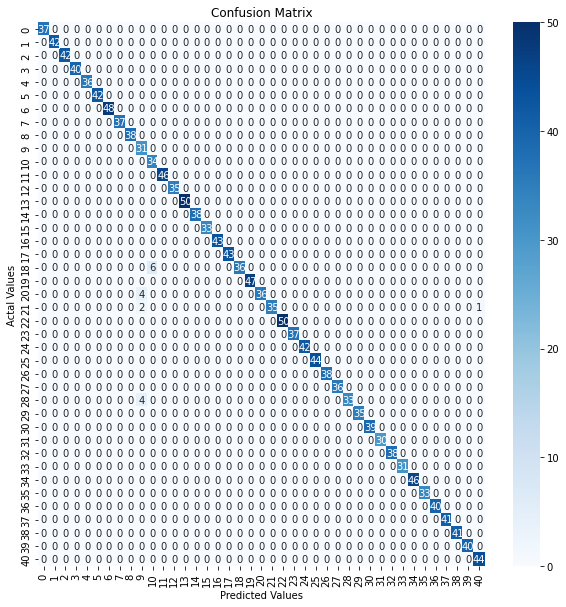

In [ ]:
y_pred=mlp1.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 0.9982693711210996


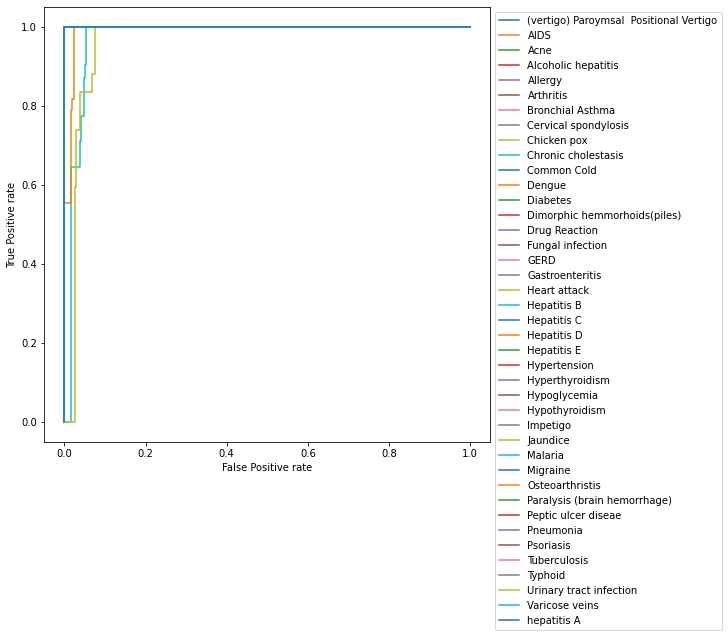

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=mlp1.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Multilayer Perceptron Logistic Activation']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

###ReLU Activation

In [ ]:
mlp2=MLP(hidden_layer_sizes=(50,),activation='relu',max_iter=12)
mlp2.fit(x_train, y_train)
accuracy = mlp2.score(x_test, y_test)
global_accuracy['Multilayer Perceptron ReLU Activation']=accuracy
print('Accuracy is: ', end='')
print(accuracy)

Accuracy is: 1.0


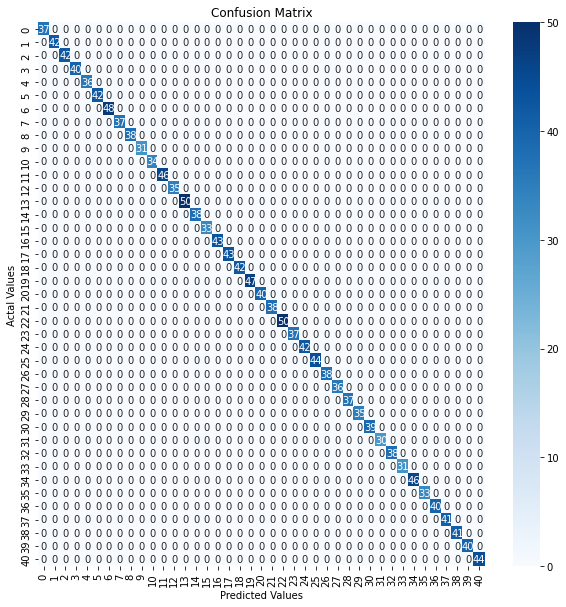

In [ ]:
y_pred=mlp2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Average area under curve is: 1.0


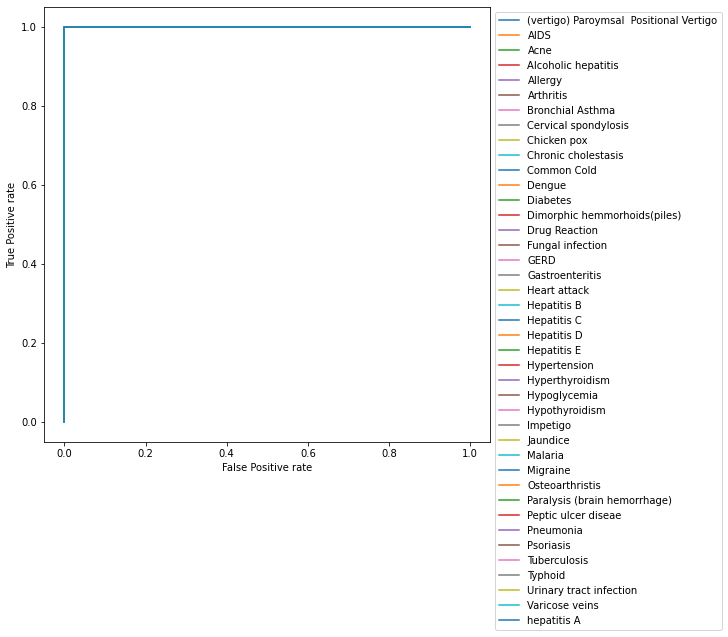

In [ ]:
plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=mlp2.predict_proba(x_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
global_auc_val['Multilayer Perceptron ReLU Activation']=avg_auc
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

#Finding the best model

In [ ]:
print("{:<45} {:<60}".format('MODEL','AREA UNDER CURVE'))
for k, v in global_auc_val.items():
    print("{:<45} {:<60.5f}".format(k, v))

MODEL                                         AREA UNDER CURVE                                            
Logistic Regression                           1.00000                                                     
Support Vector Machine                        1.00000                                                     
Multinomial Naive Bayes                       0.99976                                                     
K-Nearest Neighbours                          1.00000                                                     
Random Forest Classifier                      0.99991                                                     
Decision Tree                                 0.99949                                                     
Multilayer Perceptron Logistic Activation     0.99827                                                     
Multilayer Perceptron ReLU Activation         1.00000                                                     


In [ ]:
print("{:<45} {:<60}".format('MODEL','ACCURACY'))
for k, v in global_accuracy.items():
    print("{:<45} {:<60.5f}".format(k, v))

MODEL                                         ACCURACY                                                    
Logistic Regression                           0.95443                                                     
Support Vector Machine                        0.96613                                                     
Multinomial Naive Bayes                       0.95135                                                     
K-Nearest Neighbours                          0.96182                                                     
Random Forest Classifier                      0.98337                                                     
Decision Tree                                 0.96490                                                     
Multilayer Perceptron Logistic Activation     0.98953                                                     
Multilayer Perceptron ReLU Activation         1.00000                                                     


In [ ]:
print('Best model based on Accuracy is: '+max(global_accuracy, key=global_accuracy.get))

Best model based on Accuracy is: Multilayer Perceptron ReLU Activation


In [ ]:
y_pred = mlp2.predict(x_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
373,Acne,Acne
4916,Acne,Acne
1550,Hyperthyroidism,Hyperthyroidism
3081,AIDS,AIDS
3857,Chronic cholestasis,Chronic cholestasis
...,...,...
1257,GERD,GERD
3346,Tuberculosis,Tuberculosis
3384,Hepatitis D,Hepatitis D
3290,Hypertension,Hypertension
